In [1]:
import xarray as xr

In [2]:
ncfile = 'NEP36-CanOE/RegularGrid_715x715/historical/NEP36-CanOE_temp_historical_1986-2005_monthly_715x715.nc'

In [3]:
ds = xr.open_dataset(ncfile)

In [4]:
ds['t'] = ['fallwinter', 'fallwinter', 'springsummer',     # JFM
           'springsummer', 'springsummer', 'springsummer', # AMJ
           'springsummer', 'springsummer', 'fallwinter',   # JAS
           'fallwinter', 'fallwinter', 'fallwinter'        # OND
          ]

In [5]:
ds_surface = ds.isel(deptht=0).groupby('t').mean('t')

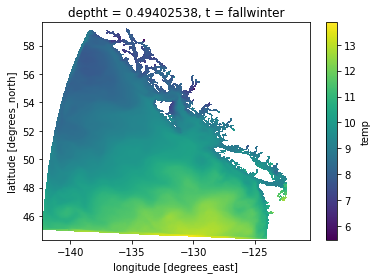

In [6]:
ds_surface.temp.sel(t='fallwinter').plot()

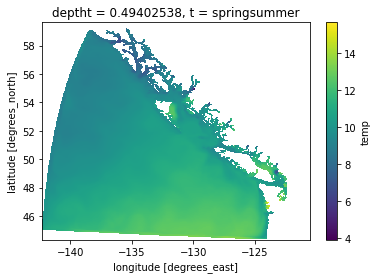

In [7]:
ds_surface.temp.sel(t='springsummer').plot()

In [8]:
temp = ds.temp
temp

<xarray.DataArray 'temp' (t: 12, deptht: 50, lat: 715, lon: 715)>
[306735000 values with dtype=float32]
Coordinates:
  * deptht   (deptht) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * lat      (lat) float32 44.33 44.35 44.38 44.4 ... 59.55 59.57 59.59 59.61
  * lon      (lon) float32 -142.3 -142.3 -142.2 -142.2 ... -120.6 -120.6 -120.6
  * t        (t) <U12 'fallwinter' 'fallwinter' ... 'fallwinter' 'fallwinter'
Attributes:
    standard_name:  sea_water_potential_temperature
    long_name:      temperature
    units:          degC

In [9]:
depth = temp.notnull().sum('deptht')

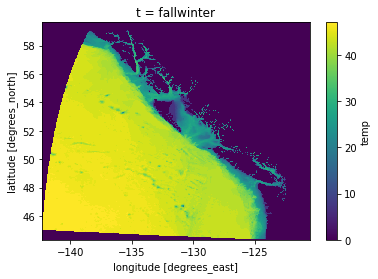

In [10]:
depth.isel(t=0).plot()

In [11]:
ds_benthic = temp.where(depth>0).isel(deptht=(depth-1)).groupby('t').mean('t')

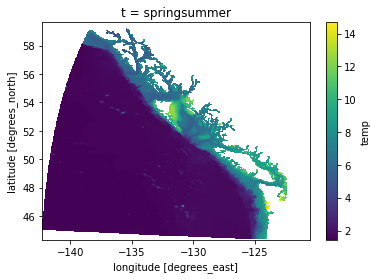

In [12]:
ds_benthic.sel(t='springsummer').plot()

In [15]:
from osgeo import gdal
gdal.UseExceptions()

In [14]:
gdal.

<module 'osgeo.gdal' from '/home/jmunroe/miniconda3/envs/spatial-data/lib/python3.9/site-packages/osgeo/gdal.py'>